# Propagación de la afinidad

In [5]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [6]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [7]:
import matplotlib.pyplot as plt
from itertools import cycle

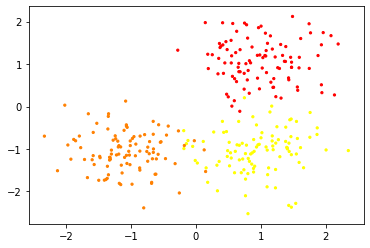

In [8]:
plt.scatter(X[:,0], X[:,1], c=labels, s = 5, cmap="autumn")#si quitamos la parte de  c=labels, s = 5, cmap="autumn" nos quita los colores

In [9]:
af = AffinityPropagation(preference=-50).fit(X)

In [10]:
af.cluster_centers_indices_

array([160, 250, 272], dtype=int64)

In [11]:
cluster_center_ids = af.cluster_centers_indices_

In [12]:
labels = af.labels_

In [14]:
n_clust = len(cluster_center_ids)
n_clust

3

In [33]:
def report_affinity_propagation(af):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Competitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("Vmeasure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: 0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
          
    plt.figure(figsize=(16,9))
    plt.clf()
          
    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clust), colors):
          class_members = (clust_labels==k)
          clust_center = X[cluster_center_ids[k]]
          plt.plot(X[class_members, 0], X[class_members, 1], col +'.')
          plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor = 'k', markersize=14)
          for x in X[class_members]:
              plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
          
          plt.title("Número estimado de clusters %d"%n_clust)
          plt.show()

Número estimado de clusters: 3
Homogeneidad: 1.000
Competitud: 1.000
Vmeasure: 1.000
R2 ajustado: 1.000
Información mútua ajustada: 0.3f
Coeficiente de la silueta: 0.753


C:\Users\Megaport\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


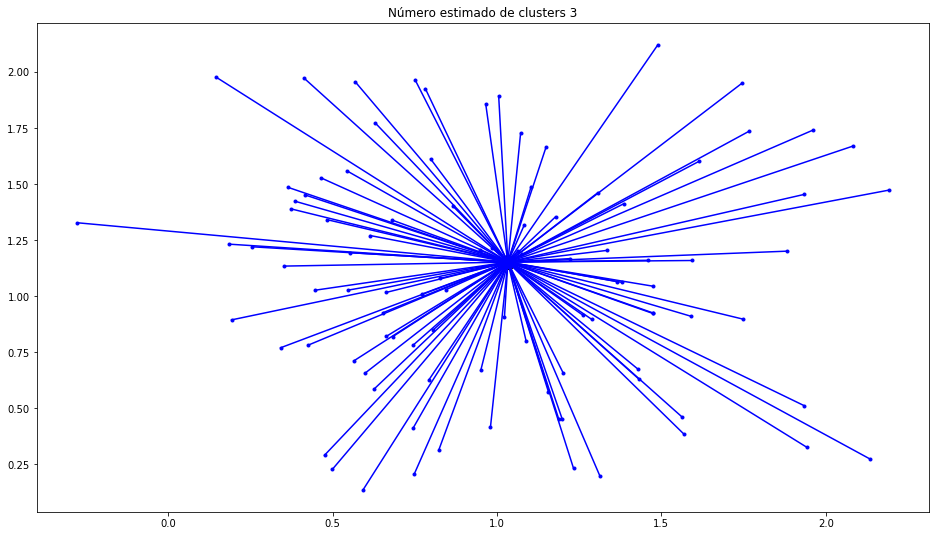

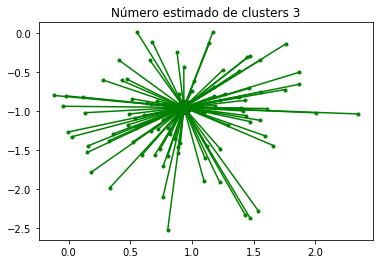

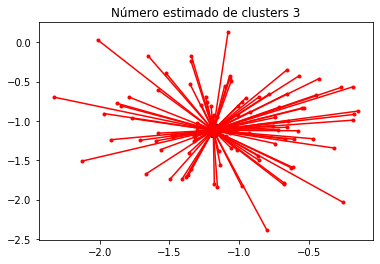

In [34]:
report_affinity_propagation(X)